In [29]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
import pandas as pd

# Read the CSV file and parse dates, setting "Date" column as the index
df = pd.read_csv(r"C:\Users\thisi\Downloads\stock prize prediction\TSLA.csv", parse_dates=True, index_col="Date")

# Display the DataFrame
print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
03-01-2011    2.456778    1.800000    1.726667   56.774667    1.774667   
04-01-2011    3.789346    1.796667    1.734667   34.778000    1.778000   
05-01-2011    6.765333    1.793333    1.746000   23.788700    1.788667   
06-01-2011    8.788667    1.866667    1.787333   45.858667    1.858667   
07-01-2011    5.866667    1.905333    1.860000    1.882667    1.882667   
...                ...         ...         ...         ...         ...   
11-03-2024  175.449997  182.869995  174.800003  177.770004  177.770004   
12-03-2024  177.770004  179.429993  172.410004  177.539993  177.539993   
13-03-2024  173.050003  176.050003  169.149994  169.479996  169.479996   
14-03-2024  167.770004  171.169998  160.509995  162.500000  162.500000   
15-03-2024  163.160004  165.179993  160.759995  163.570007  163.570007   

               Volume  
Date         

In [31]:
print(df.shape)
df.info()

(3322, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 3322 entries, 03-01-2011 to 15-03-2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3322 non-null   float64
 1   High       3322 non-null   float64
 2   Low        3322 non-null   float64
 3   Close      3322 non-null   float64
 4   Adj Close  3322 non-null   float64
 5   Volume     3322 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 181.7+ KB


In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03
mean,75.272742,76.852850,73.437228,75.229270,75.182912,9.981243e+07
std,103.010783,105.309440,100.519383,102.920561,102.944073,7.929151e+07
min,1.452000,1.484667,1.407333,1.455333,1.455333,3.594000e+06
25%,12.663833,12.886333,12.406166,12.708167,12.690500,5.076750e+07
50%,17.594333,17.815334,17.312000,17.592000,17.549667,8.450850e+07
75%,145.481670,147.974171,141.274997,143.854999,143.854999,1.250760e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization

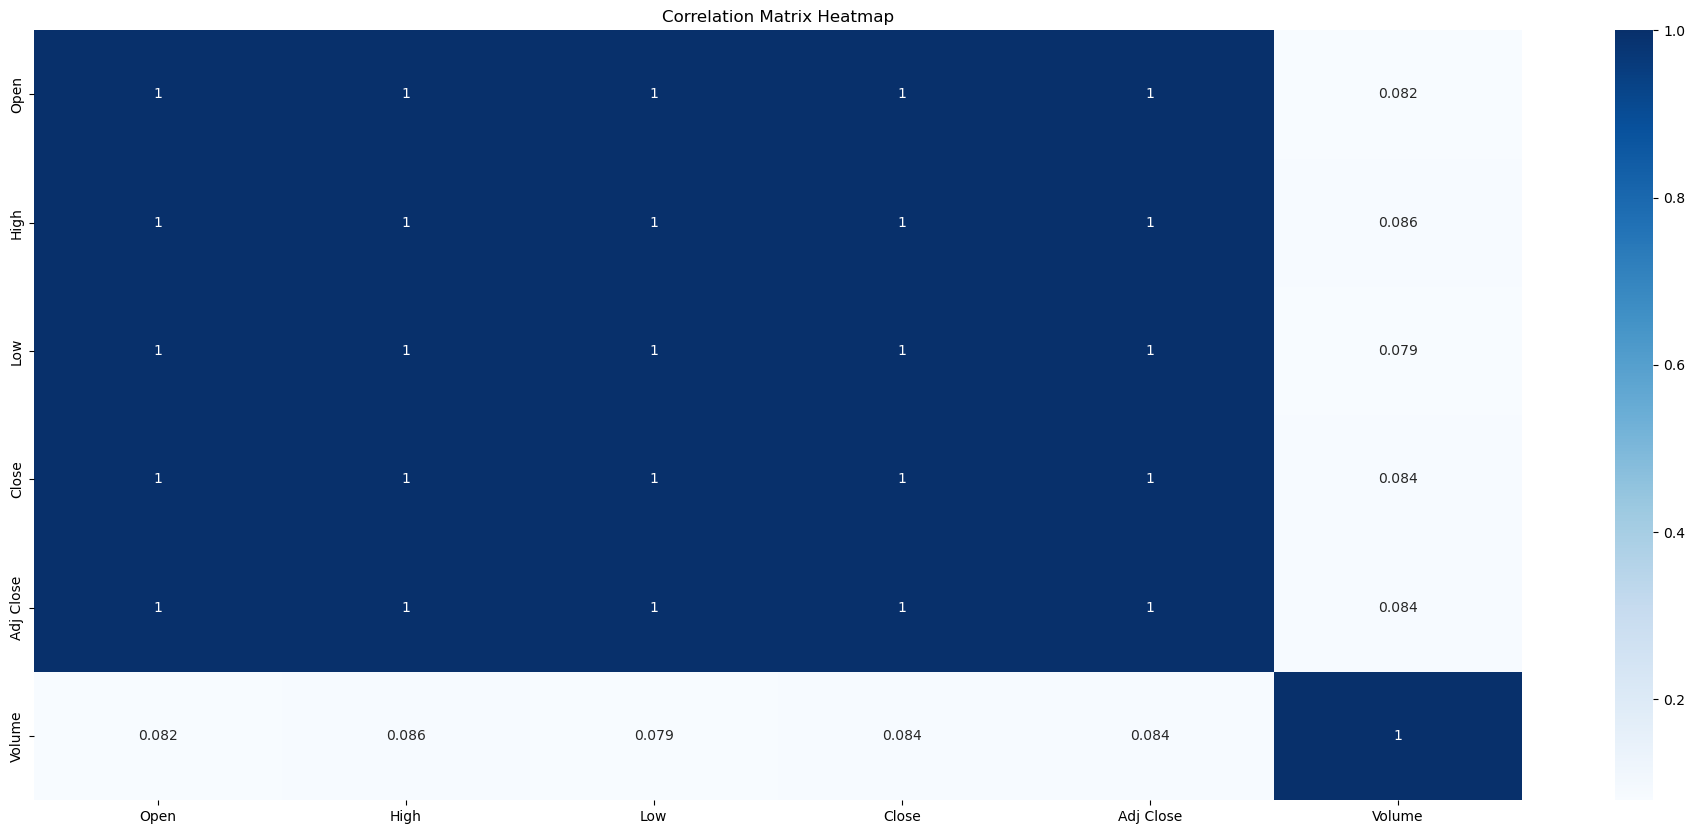

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared your DataFrame 'df'

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

# Add title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()


Text(0, 0.5, 'Close Price USD')

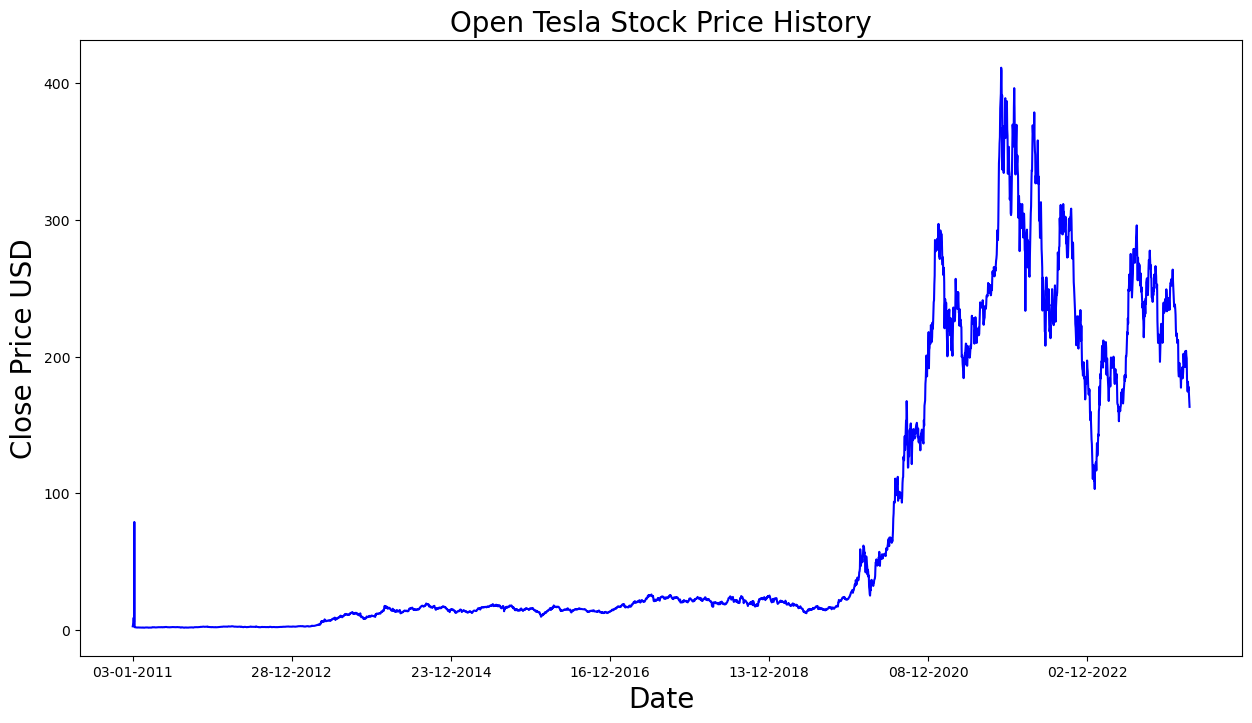

In [23]:
df["Open"].plot(figsize=(15,8) , color='blue')
plt.title("Open Tesla Stock Price History",fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize = 20)

In [24]:
# Display all the data from the DataFrame
print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
03-01-2011    2.456778    1.800000    1.726667    1.774667    1.774667   
04-01-2011    3.789346    1.796667    1.734667    1.778000    1.778000   
05-01-2011    6.765333    1.793333    1.746000    1.788667    1.788667   
06-01-2011    8.788667    1.866667    1.787333    1.858667    1.858667   
07-01-2011    5.866667    1.905333    1.860000    1.882667    1.882667   
...                ...         ...         ...         ...         ...   
11-03-2024  175.449997  182.869995  174.800003  177.770004  177.770004   
12-03-2024  177.770004  179.429993  172.410004  177.539993  177.539993   
13-03-2024  173.050003  176.050003  169.149994  169.479996  169.479996   
14-03-2024  167.770004  171.169998  160.509995  162.500000  162.500000   
15-03-2024  163.160004  165.179993  160.759995  163.570007  163.570007   

               Volume  
Date         

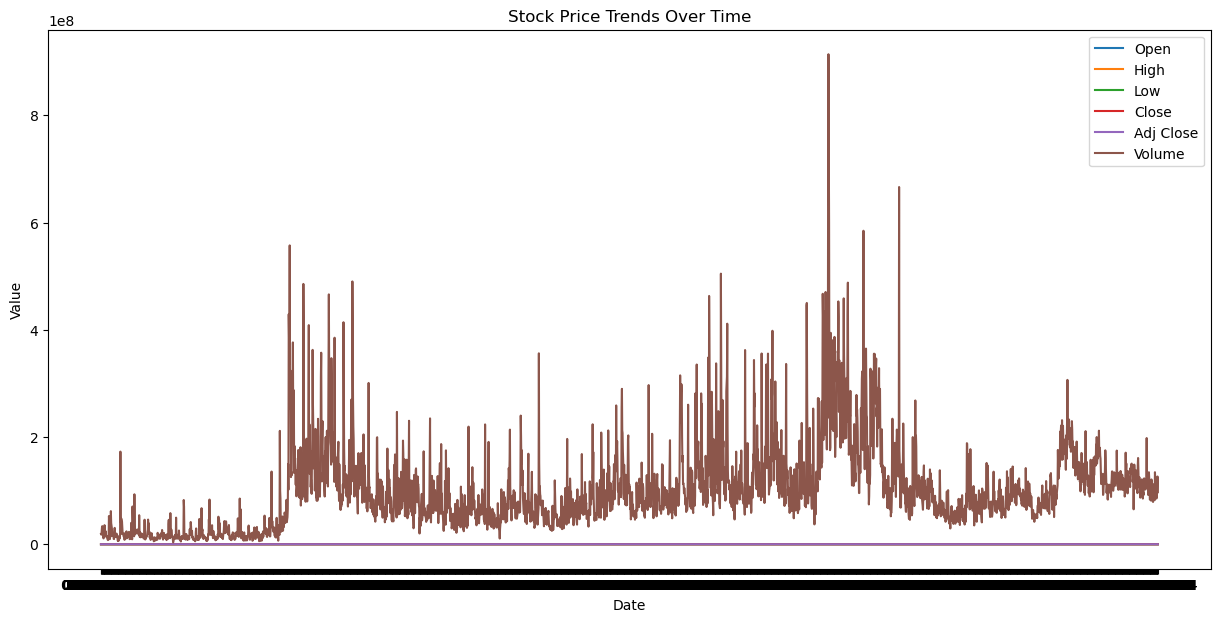

In [25]:
import matplotlib.pyplot as plt

# Plot all columns in the DataFrame
plt.figure(figsize=(15, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Trends Over Time')
plt.legend()

# Show plot
plt.show()


[  1.452      1.462      1.474    ... 396.516663 409.333344 411.470001] This is the Sorted data of Open Share Price


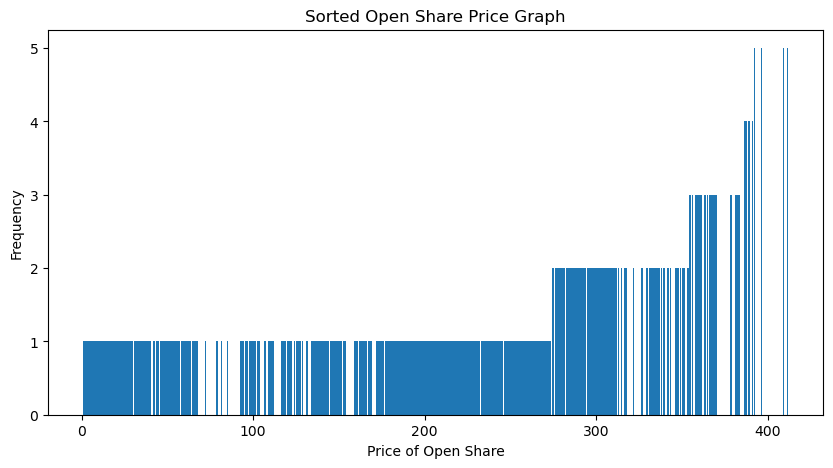

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Print sorted data of 'Open' share price
sorted_open_prices = np.sort(df['Open'])
print(sorted_open_prices, "This is the Sorted data of Open Share Price")

# Plot sorted open share prices
plt.figure(figsize=(10, 5))
plt.bar(list(np.sort(df['Open'].value_counts().keys())), list(np.sort(df['Open'].value_counts())))
plt.title("Sorted Open Share Price Graph")
plt.xlabel("Price of Open Share")
plt.ylabel("Frequency")
plt.show()


# Data Preprocessing

In [13]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

# Choosing Prediction Column

In [14]:
dataset = df["Open"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(3322, 1)

# Normalizing Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your input data

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Now 'scaled_data' contains your scaled data


# Splitting the Data

In [16]:
# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 2491 Test Size : 831


In [17]:
train_data.shape,test_data.shape

((2491, 1), (891, 1))

# Creating training set

In [17]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [18]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape , y_train.shape

((2431, 60, 1), (2431,))

# Building LSTM Model

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32 , callbacks = callbacks )

Epoch 1/100


76/76 [==============================] - 14s 73ms/step - loss: 3.0382e-04 - mean_absolute_error: 0.0090
Epoch 2/100
76/76 [==============================] - 5s 72ms/step - loss: 9.0181e-05 - mean_absolute_error: 0.0056
Epoch 3/100
76/76 [==============================] - 5s 71ms/step - loss: 7.4869e-05 - mean_absolute_error: 0.0046
Epoch 4/100
76/76 [==============================] - 5s 71ms/step - loss: 7.1910e-05 - mean_absolute_error: 0.0047
Epoch 5/100
76/76 [==============================] - 5s 71ms/step - loss: 8.3914e-05 - mean_absolute_error: 0.0052
Epoch 6/100
76/76 [==============================] - 5s 71ms/step - loss: 6.4350e-05 - mean_absolute_error: 0.0044
Epoch 7/100
76/76 [==============================] - 5s 71ms/step - loss: 5.2720e-05 - mean_absolute_error: 0.0036
Epoch 8/100
76/76 [==============================] - 5s 71ms/step - loss: 5.5537e-05 - mean_absolute_error: 0.0042
Epoch 9/100
76/76 [==============================] - 5s 70ms/step - loss: 7.1

In [ ]:
from keras.callbacks import EarlyStopping

# Define callbacks
callbacks = [EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)]

# Fit the model to the training set
history = model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=callbacks)


# Visualizing Performance

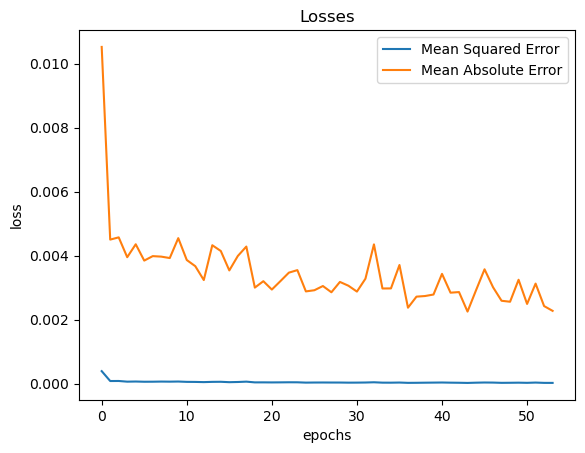

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


# Creating testing set

In [40]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
x_test.shape , y_test.shape

((831, 60, 1), (831,))

# Predicting Testing data

In [42]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

26/26 [==============================] - 3s 32ms/step


(831, 1)

# Root mean square error

In [43]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

8.02

# Visualize Predictions with The Data

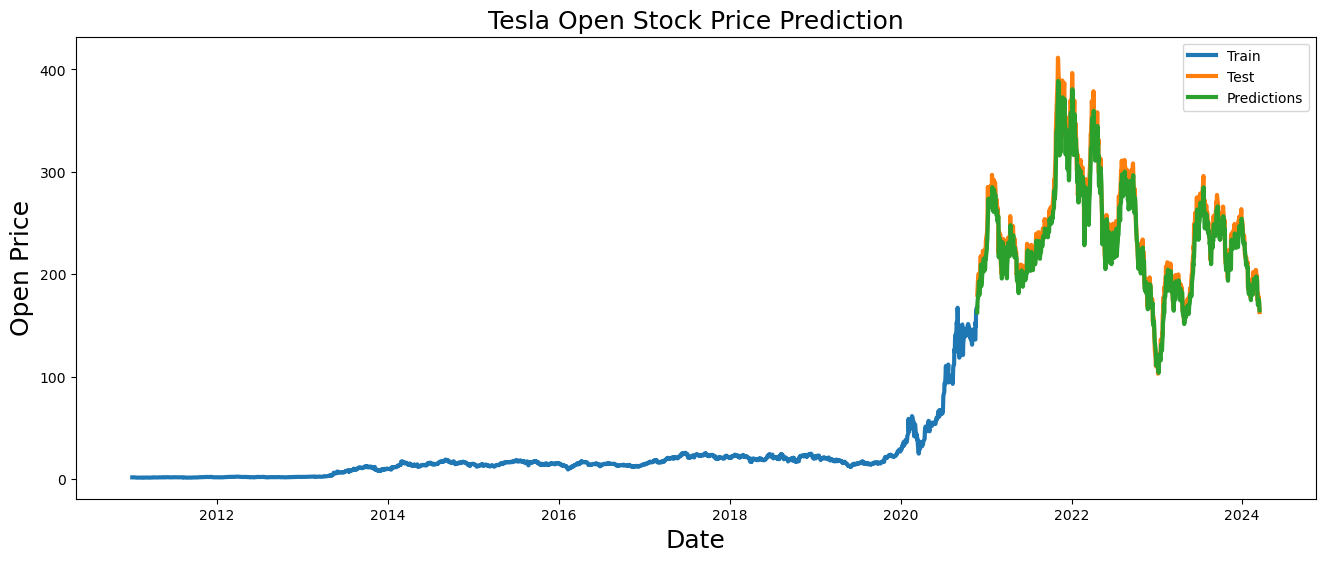

In [44]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Tesla Open Stock Price Prediction' , fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3)
plt.plot(test['Open'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])